#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset 'Salaries.csv' into a Pandas DataFrame
df = pd.read_csv('Salaries.csv')

# Displaying the first few rows of the DataFrame to inspect the data structure
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
#let's explore our columns names

df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## *Task 1*
#### Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [4]:
# Checking the dimensions of the DataFrame (number of rows, number of columns)

df.shape

(148654, 13)

In [5]:
# Displaying the data types of each column in the DataFrame

df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [6]:
# Checking for missing values in each column of the DataFrame

df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

> **The missing data found will be handled at a later stage in the analysis.**


## *Task 2*
#### Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [7]:
# Checking for negative values in the 'TotalPay' column and providing a warning if any are found

if (df['TotalPay'] < 0).any():
    
    print("Warning: Negative values found in the 'TotalPay' column. Further analysis may be needed.")

In [8]:
# Removing all rows where 'TotalPay' and 'BasePay' are less than 0

df = df[(df['TotalPay'] >= 0) & (df['BasePay'] >= 0)]

In [9]:
# Generating descriptive statistics for the 'TotalPay' column

df['TotalPay'].describe()

count    148033.000000
mean      75063.936383
std       50407.272801
min           0.000000
25%       36988.500000
50%       71648.670000
75%      106028.620000
max      567595.430000
Name: TotalPay, dtype: float64

In [10]:
# Identifying the mode of the 'TotalPay' column

df['TotalPay'].mode()

0    18594.0
Name: TotalPay, dtype: float64

## *Task 3*
#### Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [11]:
# Recap of missing values

df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148033
Agency                   0
Status              148033
dtype: int64

> **It has been identified that there are two columns ['Notes','Status'] with no values. As part of data cleaning, these columns will be dropped from the DataFrame.**


In [12]:
# Dropping columns 'Notes' and 'Status' with no values from the DataFrame

df.drop(columns=['Notes', 'Status'], inplace=True)

# Displaying the first few rows of the updated DataFrame

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


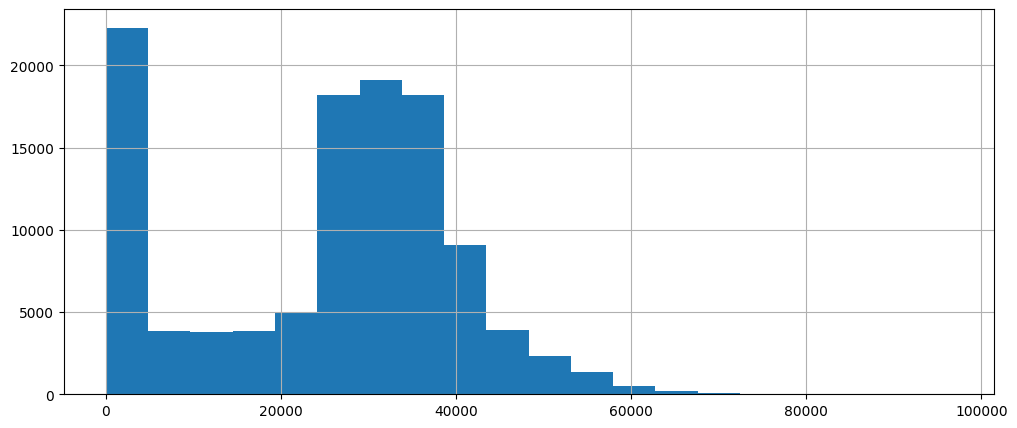

In [13]:
# Exploring the distribution of 'Benefits' column with histograms

df['Benefits'].hist(bins=20, figsize=(12, 5))

# Displaying the histograms to visualize the distribution

plt.show()

> Given that when 'Benefits' is NaN, 'BasePay' is equal to 'TotalPay,' indicating that Benefits is effectively zero. So, if 'Benefits' is NaN, it suggests there are no benefits, which is a valid scenario for some jobs.

In [14]:
# Impute missing values in 'Benifits' with zero

df['Benefits'].fillna(0, inplace=True)

In [15]:
# Checking for missing values after handling and dropping rows

df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## *Task 4*
####  Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

### Let's Assign a department to every Job Title

In [16]:
df['JobTitle'].value_counts()

JobTitle
Transit Operator                         6975
Special Nurse                            4382
Registered Nurse                         3725
Public Svc Aide-Public Works             2514
Police Officer 3                         2411
                                         ... 
PRINCIPAL INVESTIGATOR, TAX COLLECTOR       1
BUILDING SERVICES TECHNICIAN                1
TRIAL DELAY REDUCTION COORDINATOR           1
POWERHOUSE ELECTRICIAN SUPERVISOR II        1
Cashier 3                                   1
Name: count, Length: 2154, dtype: int64

In [17]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Get unique values and display them
unique_values = df['JobTitle'].unique()
for value in unique_values:
    print(value)

GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
CAPTAIN III (POLICE DEPARTMENT)
WIRE ROPE CABLE MAINTENANCE MECHANIC
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
ASSISTANT DEPUTY CHIEF II
BATTALION CHIEF, (FIRE DEPARTMENT)
DEPUTY DIRECTOR OF INVESTMENTS
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
EXECUTIVE CONTRACT EMPLOYEE
DEPARTMENT HEAD V
COMMANDER III, (POLICE DEPARTMENT)
CAPTAIN, EMERGENCYCY MEDICAL SERVICES
ASSISTANT MEDICAL EXAMINER
CAPTAIN, FIRE SUPPRESSION
CHIEF OF POLICE
DEPUTY CHIEF III (POLICE DEPARTMENT)
INSPECTOR III, (POLICE DEPARTMENT)
ELECTRONIC MAINTENANCE TECHNICIAN
ADMINISTRATOR, SFGH MEDICAL CENTER
LIEUTENANT III (POLICE DEPARTMENT)
FIREFIGHTER
NURSING SUPERVISOR PSYCHIATRIC
MAYOR
LIEUTENANT, FIRE DEPARTMENT
INCIDENT SUPPORT SPECIALIST
ANESTHETIST
DISTRICT ATTORNEY
ELECTRICAL TRANSIT MECHANIC, ASSISTANT SUPERVISOR
PORT DIRECTOR
LIEUTENANT, BUREAU OF FIRE PREVENTION AND PUBLIC S
SENIOR PHYSICIAN SPECIALIST
FIRE FIGHTER PARA

In [18]:
# Initializing a default department and assigning specific departments based on job title keywords

df['Department'] = 'Other'

# Defining custom departments based on common keywords or phrases

departments = {
    'Transportation Department': ['Transit Operator', 'Driver', 'Transit','TRANSPORTATION'],
    'Police Department': ['Police', 'Deputy', 'Sheriff', 'Officer', 'Lieutenant', 'Trooper', 'Captain', 'Commander', 'Inspector','chief','CHF','sergeant'],
    'Security Department': ['Guard', 'Custodian', 'Protective', 'Support'],
    'Healthcare Department': ['Nurse', 'Doctor', 'Dr', 'Health', 'Medical', 'Patient', 'Nursery','Clinical', 'Anaesthetist', 'Physician', 'Physical', 'Therapist', 'Nutritionist','FORENSIC','PHARMACIST','DENTIST'],
    'Fire Department': ['Firefighter', 'Fire', 'Suppression', 'Battalion'],
    'Legal Department': ['Attorney', 'Eligibility', 'Legal', 'Court'],
    'Maintenance Department': ['Mech', 'Mechanic', 'Carpenter', 'Electrician','MAINTENANCE','Plumber'],
    'Engineering Department': ['Engineer', 'Eng','Engr', 'Technician', 'Engineering'],
    'Public Service Department': ['Public', 'Clerk', 'Svc', 'PS', 'Library','Food','Gardener','Instructor', 'Recreation', 'Worker', 'Librarian','Social','Coordinator','porter','Family', 'Svcs', 'Instructor', 'Preparator', 'Labourer','sewage','Service','Train Controller'],
    'Administrative Department': ['Manager', 'Management', 'Head', 'Supervisor', 'Administrator', 'Supv','DIR','MGR'],
    'Analytics Department': ['Analyst', 'Tech', 'Research','Criminalists'],
    'Financial Deparment':['Accountant']
}

# Grouping job titles into departments based on the defined categories

for department, keywords in departments.items():
    mask = df['JobTitle'].str.contains('|'.join(keywords), case=False)
    df.loc[mask, 'Department'] = department

In [19]:
# Displaying the count of job titles assigned to each department

df['Department'].value_counts()

Department
Public Service Department    39852
Healthcare Department        19068
Police Department            17517
Other                        17133
Administrative Department    10049
Transportation Department    10047
Analytics Department          8830
Engineering Department        6736
Security Department           5942
Fire Department               5797
Maintenance Department        3508
Legal Department              2546
Financial Deparment           1008
Name: count, dtype: int64

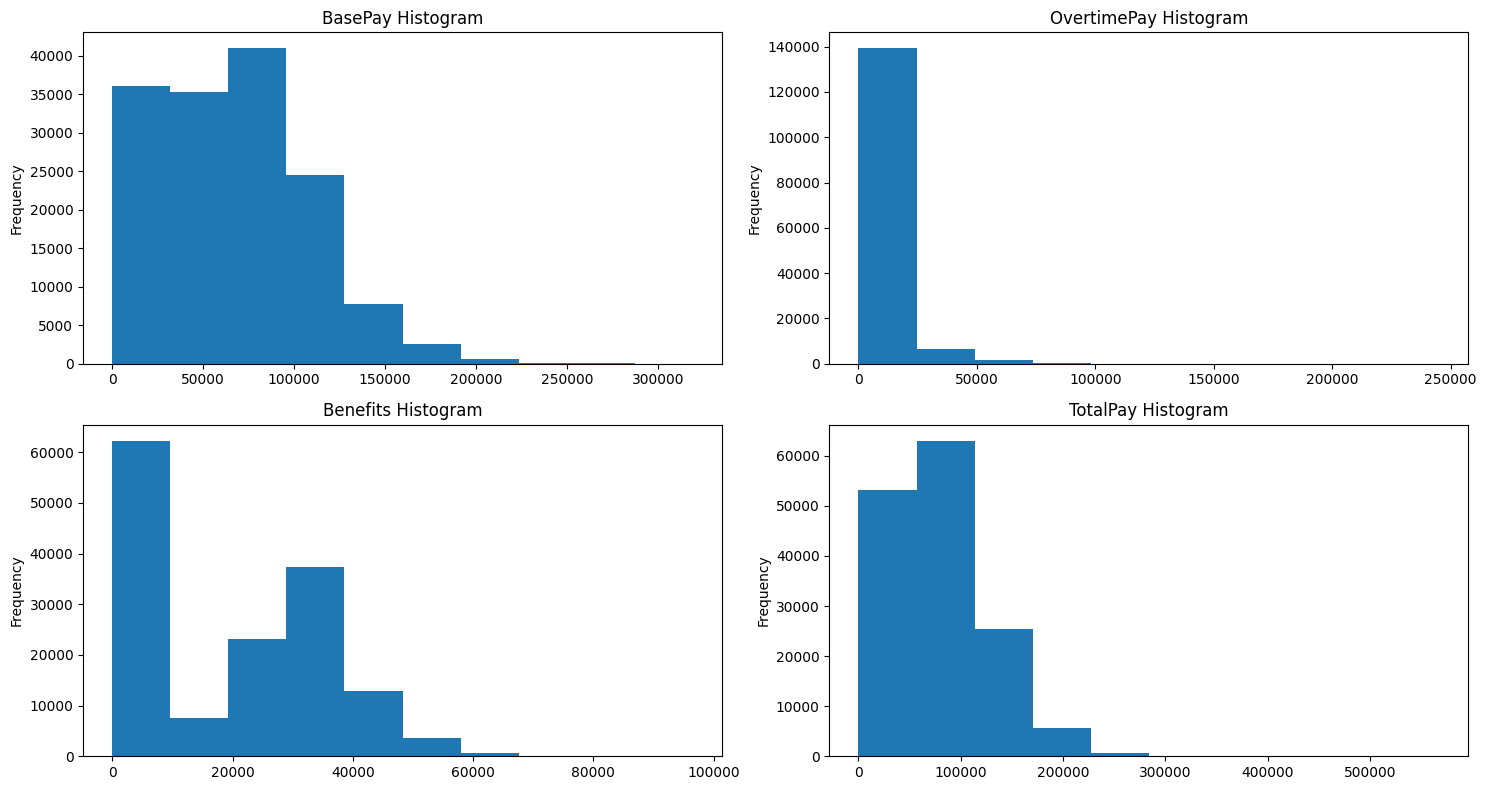

In [20]:
#let's explore the salaries columns

# Set up a 2x3 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot histograms for each column
df['BasePay'].plot(kind='hist', ax=axes[0, 0], title='BasePay Histogram')
df['OvertimePay'].plot(kind='hist', ax=axes[0, 1], title='OvertimePay Histogram')
df['Benefits'].plot(kind='hist', ax=axes[1, 0], title='Benefits Histogram')
df['TotalPay'].plot(kind='hist', ax=axes[1, 1], title='TotalPay Histogram')

# Add a layout adjustment
plt.tight_layout()

# Show the plots
plt.show()

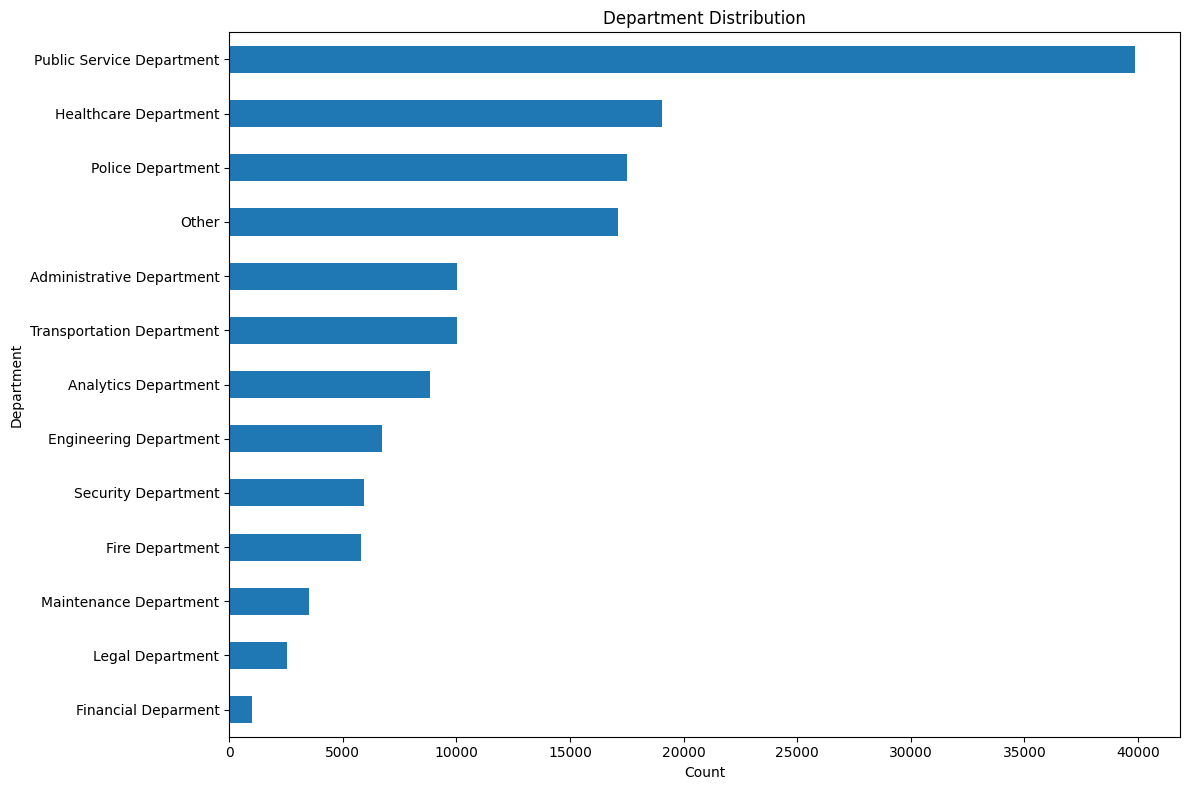

In [21]:
# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
df['Department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Department Distribution')
plt.xlabel('Count')
plt.ylabel('Department')

# Show the plot
plt.tight_layout()
plt.show()

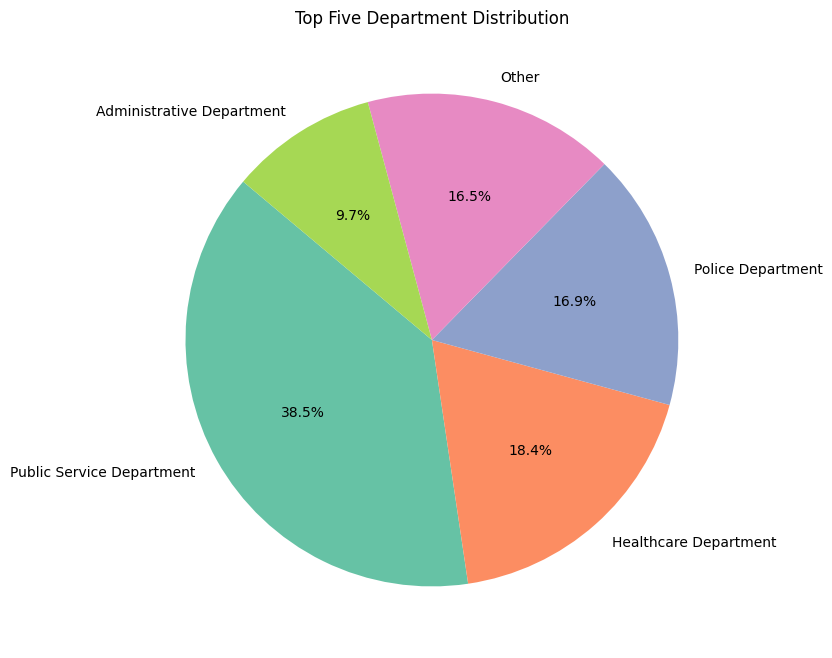

In [22]:
# Plotting the distribution of the top five departments using a pie chart

department_counts = df['Department'].value_counts().head()

# Plotting a pie chart with proportions

plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct=lambda p: '{:.1f}%'.format(p), startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top Five Department Distribution')

# Displaying the plot

plt.show()


## *Task 5*
#### Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [23]:
# Grouping the dataset by department and calculating summary statistics for 'BasePay' and 'TotalPay'

df.groupby('Department')[['BasePay', 'TotalPay']].agg(['max', 'min', 'mean', 'median'])

BasePay                                  \
                                 max  min           mean      median   
Department                                                             
Administrative Department  315572.01  0.0  102125.295073   98899.050   
Analytics Department       176039.20  0.0   74075.628967   76869.005   
Engineering Department     201705.50  0.0   82113.660791   86095.725   
Financial Deparment        119516.19  0.0   72245.572411   77140.540   
Fire Department            313686.01  0.0  109784.480869  111853.860   
Healthcare Department      271831.50  0.0   63656.197630   59183.515   
Legal Department           252221.06  0.0  109955.080562  110754.170   
Maintenance Department     140942.56  0.0   75259.774792   79283.500   
Other                      318835.49  0.0   60675.754845   63753.200   
Police Department          319275.01  0.0   94397.269174   98513.830   
Public Service Department  239247.00  0.0   42220.929399   47751.555   
Security Department        132182.59  0.0   37110.187922   45635.305   
Transportation Department  154690.60  0.0   52003.599160   62788.410   

                            TotalPay                                    
                                 max    min           mean      median  
Department                                                              
Administrative Department  567595.43   0.00  109884.997963  110571.310  
Analytics Department       336393.73   0.00   78249.560177   79724.675  
Engineering Department     241126.97   0.00   87586.416170   95108.675  
Financial Deparment        119516.19  70.23   72810.939435   77458.760  
Fire Department            362844.66   0.00  152113.140863  153845.040  
Healthcare Department      322886.84   0.00   70540.391351   64608.285  
Legal Department           252221.06  13.35  112336.243775  113477.705  
Maintenance Department     332343.61   0.00   93199.370108   96376.110  
Other                      390111.98   0.00   65250.924983   68838.040  
Police Department          538909.28   0.00  113887.368810  118690.000  
Public Service Department  278569.21   0.00   45224.000102   50052.200  
Security Department        273164.65   0.00   40481.468142   49477.035  
Transportation Department  214221.36   0.00   65477.635880   72532.160

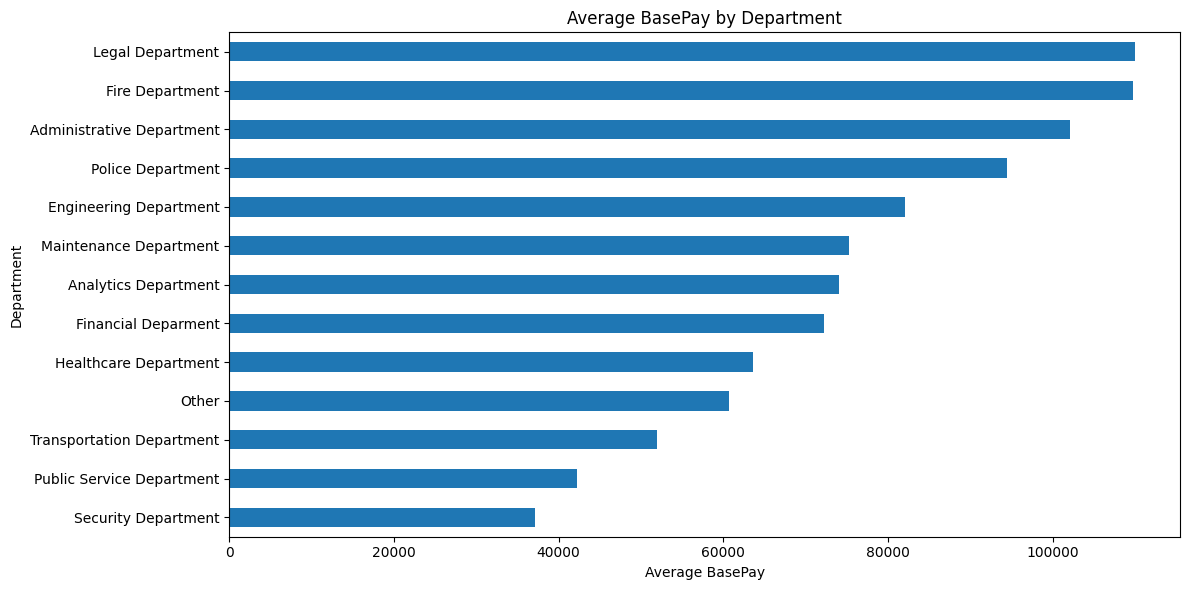

In [24]:
# Calculating the average 'BasePay' for each department and plotting a bar chart

average_basepay = df.groupby('Department')['BasePay'].mean()

# Plotting a horizontal bar chart

plt.figure(figsize=(12, 6))
average_basepay.sort_values().plot(kind='barh')
plt.title('Average BasePay by Department')
plt.xlabel('Average BasePay')
plt.ylabel('Department')

# Displaying the plot

plt.tight_layout()
plt.show()

## *Task 6*
#### Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

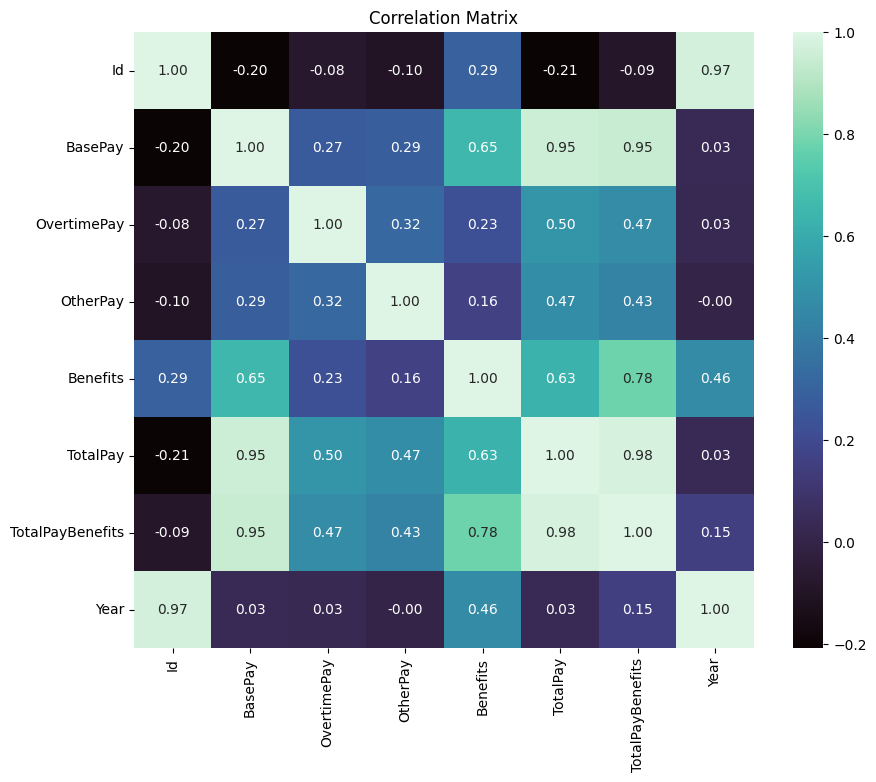

In [25]:
# Selecting numerical columns and calculating the correlation matrix

numerical_columns = df.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

# Visualizing the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

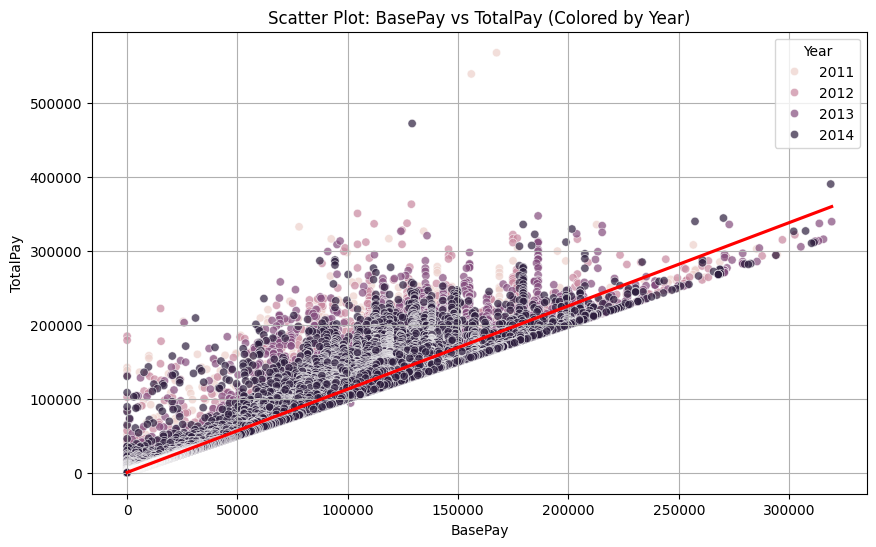

In [26]:
# Creating a scatter plot with regression line and using 'Year' as hue

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='BasePay', y='TotalPay', hue='Year', data=df, alpha=0.7)
sns.regplot(x='BasePay', y='TotalPay', data=df, scatter=False, ax=scatter_plot, color='red')
plt.title('Scatter Plot: BasePay vs TotalPay (Colored by Year)')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()


## *Task 7*
#### **Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.**

## Insights:
1. Job Title Variations:
   - The dataset contains numerous variations in job titles with typos, different cases, and abbreviations. Assigning departments based on job titles was challenging. Consider creating predefined categories when collecting data in the future for better consistency.

2. Departments with the highest average salary:
   - Legal Department and Fire Department have the highest average salary, followed by the Administrative Department.

3. TotalPay Mode and Zero Values:
   - The second repeating value of the 'TotalPay' column is 0, indicating a significant number of entries with no recorded salary. Further analysis is needed to understand and address the presence of zero values, which may represent cases where no salary information is provided for certain jobs.

4. Redundant Column:
   - The 'Agency' column has only one unique value, making it redundant. Consider removing or consolidating this column for simplicity.
